<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/face_recognition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#conversion to Black and White(grayscale)
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#detect faces
faceCoordinates=trainedData.detectMultiScale(grayimg)
print(faceCoordinates)

[[1779  139   53   53]
 [ 514  149   56   56]
 [1139  125   67   67]
 [1576  130   66   66]
 [1506  114   55   55]
 [ 296  147   65   65]
 [ 110   96   80   80]
 [ 716  135   76   76]
 [1773  276   62   62]
 [1060  112  110  110]
 [ 922  281   94   94]
 [ 108  309   55   55]
 [1360  458   58   58]
 [ 931  478   57   57]
 [1369  301   60   60]
 [ 300  298   66   66]
 [1565  470   64   64]
 [1764  476   70   70]
 [1365  278   65   65]
 [ 699  278   97   97]
 [1168  294   83   83]
 [1555  312   88   88]
 [ 529  515   49   49]
 [1139  650   40   40]
 [1571  618   62   62]
 [  78  615   76   76]
 [ 725  648   63   63]
 [1786  656   59   59]
 [ 496  636   84   84]
 [ 292  784   61   61]
 [1782  815   53   53]
 [ 726  799   67   67]
 [1555  800   64   64]
 [1361  822   61   61]
 [ 510  793   74   74]
 [  76  804   75   75]
 [1129  787   98   98]
 [1366  981   60   60]]


In [6]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [3]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=84ad6adf6aa5b72864ba3eed0b6946080a894da1e1775c3fd2b8c365bb09194e
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import face_recognition as fr
import cv2 


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
img=cv2.imread('/content/drive/MyDrive/Face/elon.jpg')

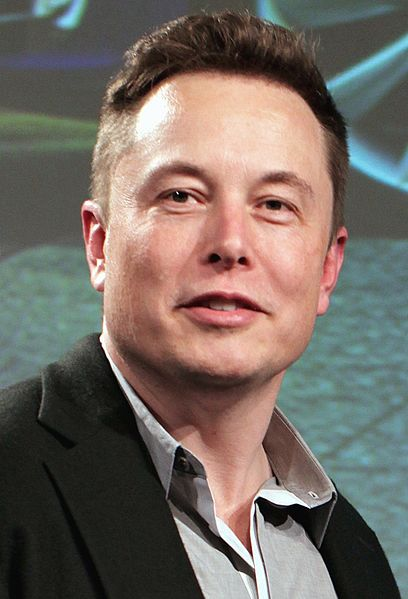

In [30]:
cv2_imshow(img)


In [33]:
image=fr.load_image_file('/content/drive/MyDrive/Face/elon.jpg')
face_locations=fr.face_locations(image)
print("there are",len(face_locations)"people in this image")

there are 1 people in this image


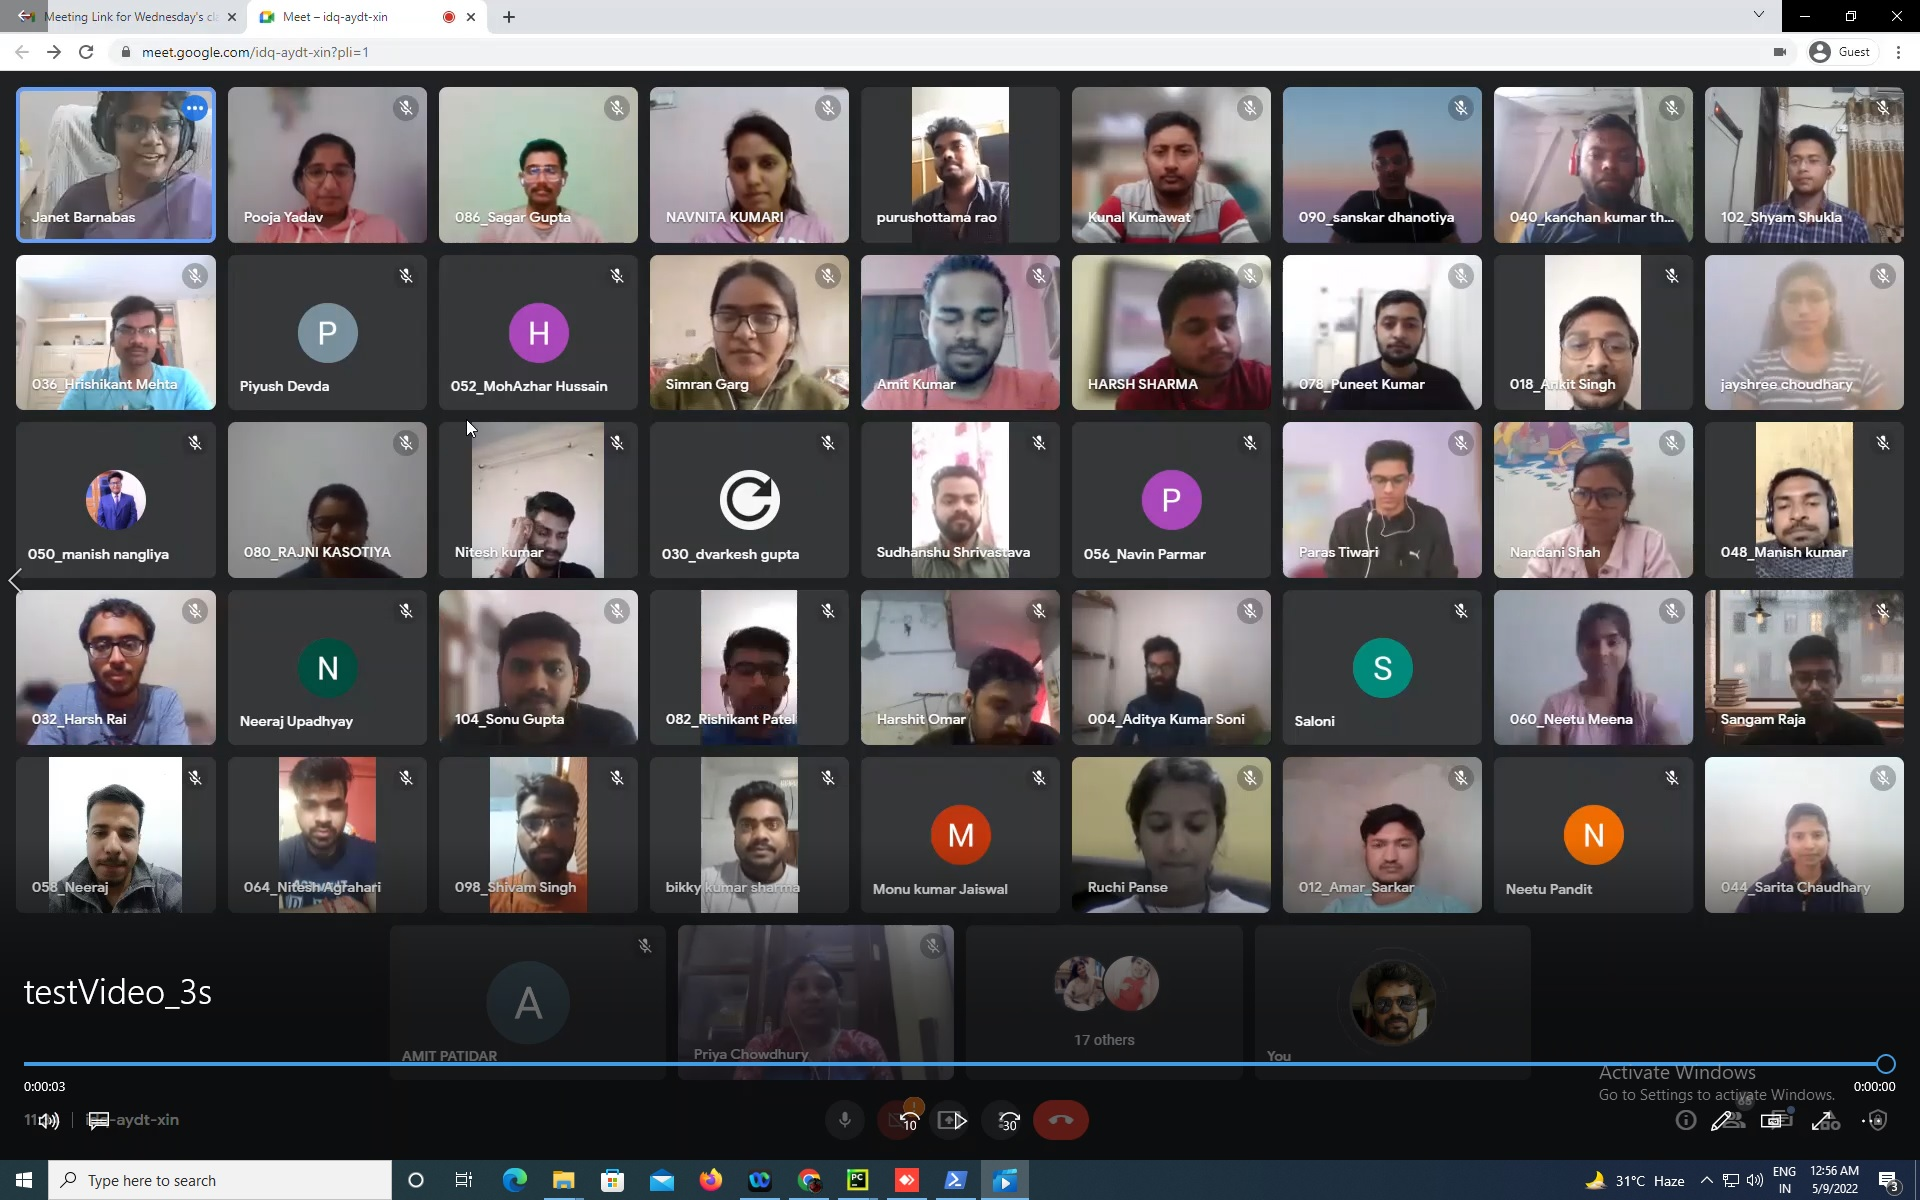

-1

In [9]:
trainedData=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#choose image
img=cv2.imread("/content/drive/MyDrive/Untitled folder/test.jpg")
#display image
cv2_imshow(img)
#pause execution of program until any key is pressed
cv2.waitKey()

In [17]:

print("there are",len(faceCoordinates),"people in this image")

there are 38 people in this image


In [19]:
import face_recognition
img_of_elon=face_recognition.load_image_file('/content/drive/MyDrive/Face/elon.jpg')
elon_face_encoding=face_recognition.face_encodings(img_of_elon)[0]



In [20]:
unknown_img=face_recognition.load_image_file('/content/drive/MyDrive/Test image/elon1.jpg')
unknown_face_encoding=face_recognition.face_encodings(unknown_img)[0]

In [23]:
results=face_recognition.compare_faces([elon_face_encoding],unknown_face_encoding)

In [24]:
if results[0]:
  print('This is elon')
else:
  print('this is not elon')

This is elon


In [29]:
from PIL import Image
import face_recognition
image=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/groups/team1.jpg')
face_locations=face_recognition.face_locations(image)
#print(face_locations)

for face_location in face_locations:
  top,right,bottom,left=face_location
  face_image=image[top:bottom,left:right]
  pil_image=Image.fromarray(face_image)
  pil_image.show()
  pil_image.save(f'{top}.jpg')

In [30]:
import face_recognition
from PIL import Image,ImageDraw




In [32]:
import face_recognition
img_of_bill=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/known/Bill Gates.jpg')
bill_face_encoding=face_recognition.face_encodings(img_of_bill)[0]





In [35]:
img_of_steve=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/known/Steve Jobs.jpg')
steve_face_encoding=face_recognition.face_encodings(img_of_steve)[0]



In [37]:
#create array of encodings and names
known_face_encodings=[
                      bill_face_encoding,steve_face_encoding
]

known_face_names=["Bill Gates",
                  "Steve Jobs"]

In [46]:
#load test image to find faces in
test_image=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/groups/bill-steve.jpg')

#find faces in test image
face_locations=face_recognition.face_locations(test_image)
face_encodings=face_recognition.face_encodings(test_image,face_locations)

#Convert to PIL format
pil_image=Image.fromarray(test_image)

#create a ImageDraw instance
draw=ImageDraw.Draw(pil_image)

#loop through faces im test image
for(top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches=face_recognition.compare_faces(known_face_encodings,face_encoding)

  name="Unknown Person"

  #if match
  if True in matches:
    first_match_index=matches.index(True)
    name=known_face_names[first_match_index]

  #Draw Rectangle
  draw.rectangle(((left,top),(right,bottom)),outline=(0,0,0))

  #Draw label
  text_width,text_height=draw.textsize(name)
  draw.rectangle(((left,bottom-text_height-10),(right,bottom)),fill=(0,0,0),outline=(0,0,0))
  draw.text((left+6,bottom-text_height-5),name,fill=(255,255,255,255))

del draw

pil_image.show()


  

  



  


In [52]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
!python identify.py

  File "identify.py", line 20
    !pip install face_recognition
    ^
SyntaxError: invalid syntax
